<a href="https://colab.research.google.com/github/ttogle918/ds-section2-sprint3/blob/main/n234-interpreting-ml-model/n234a-interpreting-ml-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 4*

# 📝 Assignment
---

# Interpreting ML Model

### 1) PDP를 만들어 모델을 설명하세요
- 한 특성에 대한 PDP를 만들고 모델을 설명하세요
- 두 특성간 관계에 대한 PDP를 만들고 모델을 설명하세요
- **Boston 데이터의 train 데이터를 사용해 PDP plots을 그린 후, 집값에 대해 양의 선형관계를 나타내는 특성을 고르세요.**
    - 1) LSTAT
    - 2) B
    - 3) TAX
    - 4) AGE


In [1]:
# 필요한 module 설치

# !pip install shap
# !pip install pdp
# !pip install pdpbox
# !pip install category_encoders

## PDP(부분 의존도 그림)
### 일부 특성들의 PDP ( 특성이 타겟에 어떻게 영향을 주는가? )

In [2]:
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split
import pandas as pd

shap.initjs();

df, target = shap.datasets.boston()
X_train,X_test,y_train,y_test = train_test_split(df, target, test_size=0.2, random_state=2)

model = xgboost.XGBRegressor().fit(X_train, y_train)

X_train.head(2)

[05:39:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.9,6.87
37,0.08014,0.0,5.96,0.0,0.499,5.850,41.5,3.9342,5.0,279.0,19.2,396.9,8.77


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


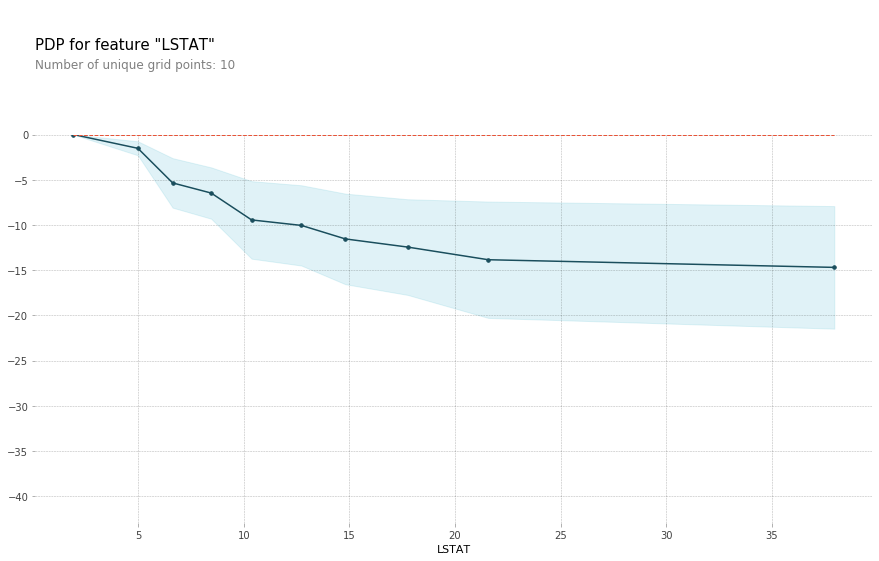

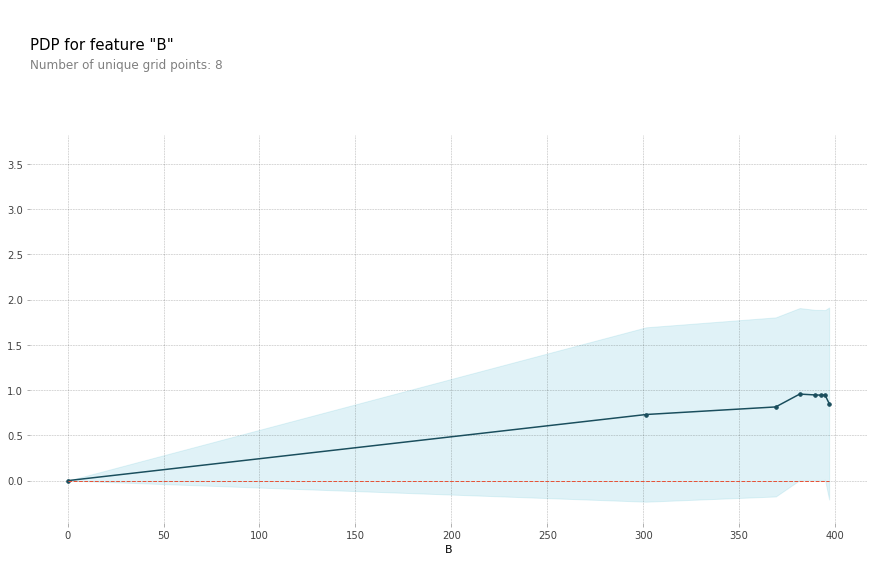

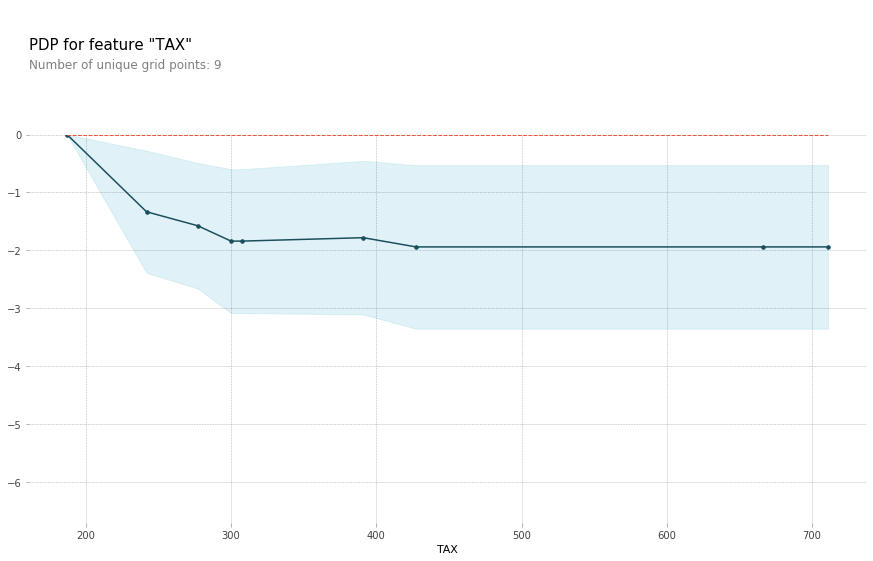

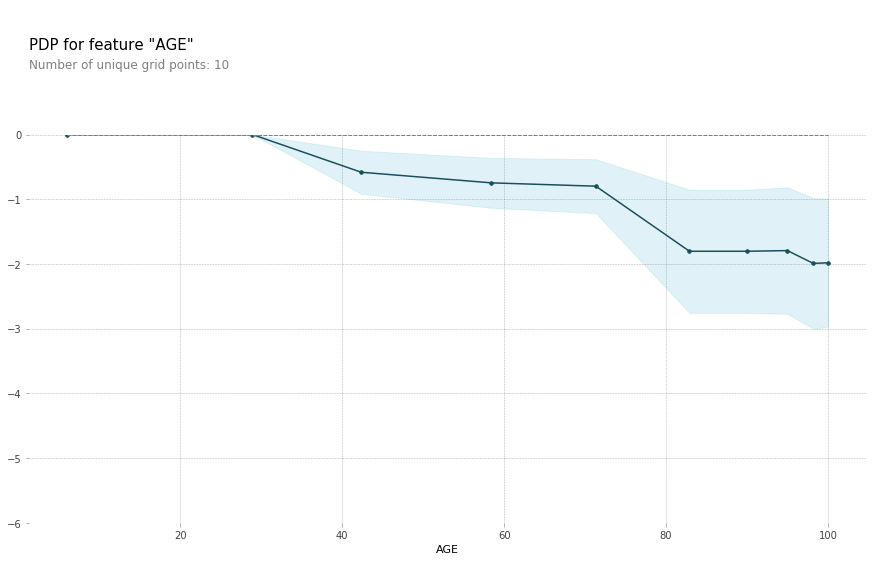

In [3]:
from pdpbox.pdp import pdp_isolate, pdp_plot

features = ['LSTAT', 'B', 'TAX', 'AGE']

# pdp plot 그리기
for feature in features:
    isolated = pdp_isolate(model=model, dataset=X_train, model_features=X_train.columns,
                           feature=feature, grid_type='percentile', num_grid_points=10)
    pdp_plot(isolated, feature_name=feature)

## 두가지 특성 비교
### B와 LSTAT의 특성을 동시에 비교

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


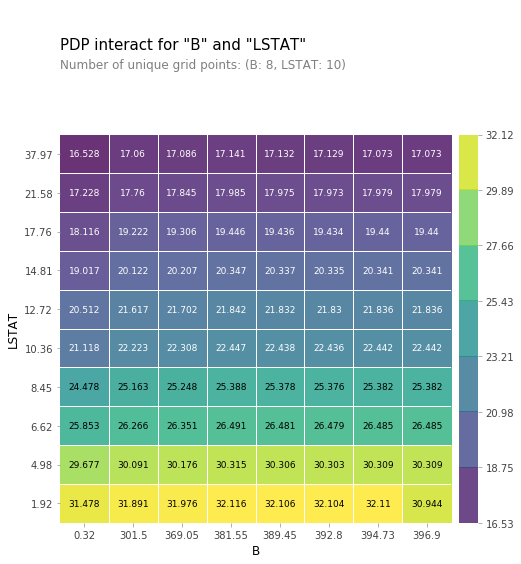

In [4]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['B', 'LSTAT']

interaction = pdp_interact(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

### 2) SHAP 라이브러리를 사용해 최소 3개 이상 시각화를 하고 분석하세요
- 본인 포트폴리오 데이터를 사용해서 SHAP 시각화를 수행하세요
- **SHAP 라이브러리를 사용해 다음 문항 중 설명이 올바른 항목을 선택하세요.**
    - 1) force_plot을 그려보면 CRIM은 항상 가격을 낮추는 영향을 준다.
    - 2) SHAP의 summary_plot을 사용하면 permutation importance를 구할 수 있다.
    - 3) SHAP summary_plot을 그려보면 (조건: X_train, plot_type='bar') LSTAT이 가장 영향력이 큰 특성으로 보인다.
    - 4) 모델의 feature importance(model.feature_importances_)를 구하면 가장 영향력이 큰 특성이 LSTAT임을 알 수있다.


1. force_plot
2. summary_plot(bar)
3. summary_plot(violin)

In [5]:
# 선택한 데이터 대신 위의 보스턴 집값 예측 데이터로 대신한다.
import shap
shap.initjs();

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train.iloc[[0]])
shap.force_plot(base_value=explainer.expected_value, shap_values = shap_values, features=X_train.iloc[[0]])

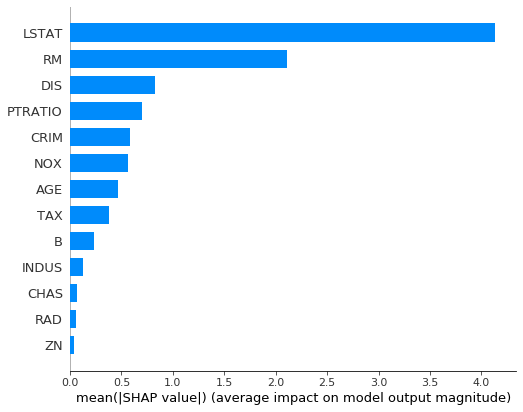

In [6]:
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='bar')

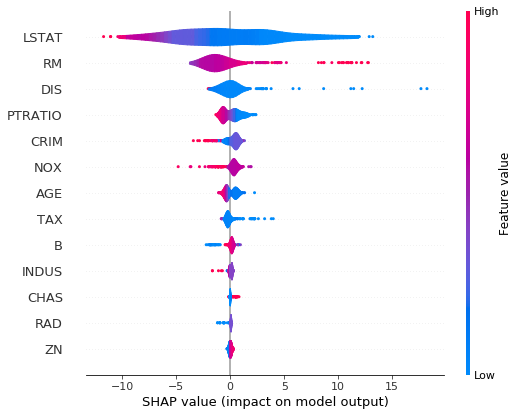

In [7]:
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type='violin')

## 🔥 도전과제

### 3) 지속적으로 포트폴리오 프로젝트를 수행하세요
- 지속적으로 데이터를 랭글링 하고 추가적인 시각화 결과를 만드세요

In [8]:
### 이곳에서 과제를 진행해 주세요 ###